In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug200.csv")
df.head()
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for index in range(1, 4):
    x[:, index] = le.fit_transform(x[:, index])
x[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
y_test

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

## Using Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [6]:
accuracy = np.sum(np.equal(y_pred, y_test))
accuracy * 1./len(y_test)

1.0

## Using Decision Tree for classification

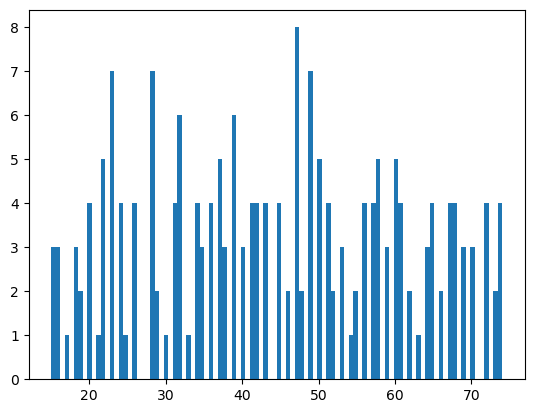

In [14]:
plt.hist(x[:, 0], bins = 100);

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
np.equal(y_pred, y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])